# 准备工作
## 准备数据
在准备工作阶段首先应该观察数据，并对数据做一定的处理
### 观察整个数据集

In [1]:
# 导入相关数据包
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt

import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn

In [2]:
data = pd.read_csv('./house_price/train.csv')

In [3]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
data = data.set_index(['Id'])

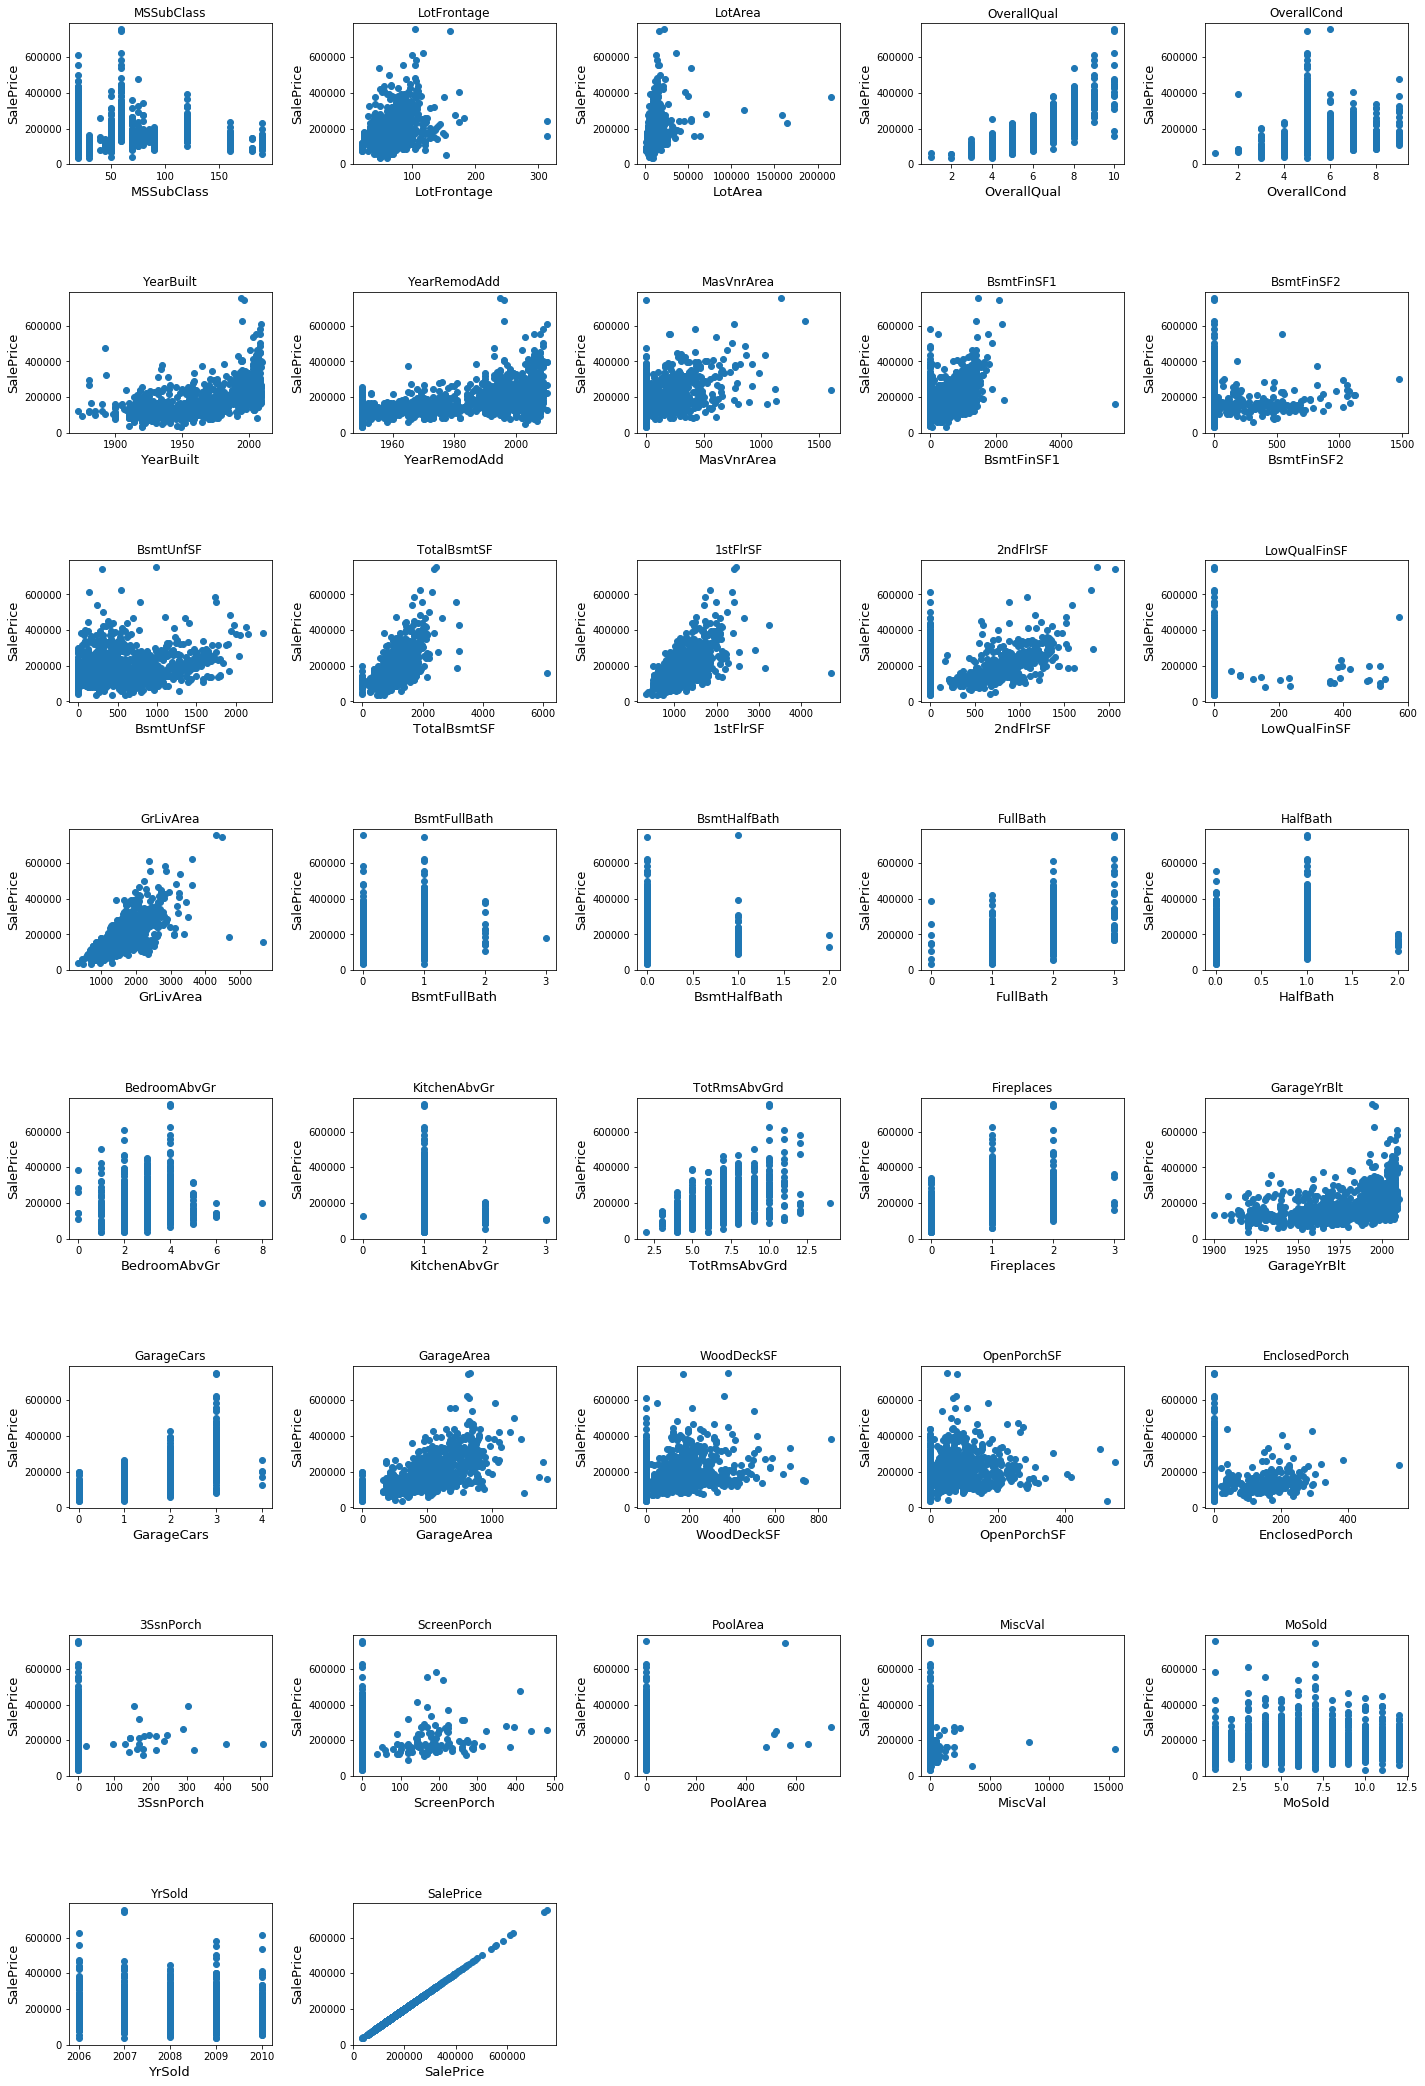

In [5]:
fig = plt.figure(figsize=(24, 36))
count = 1
for x in data[data.columns[data.dtypes != 'object']]:
    ax = fig.add_subplot(8,5, count)
    ax.scatter(y=data['SalePrice'], x=data[x])
    ax.set_xlabel(x, fontsize=13)
    ax.set_ylabel('SalePrice', fontsize=13)
    ax.set_title(x)
    count += 1
plt.subplots_adjust(hspace=0.9, bottom=0.1, wspace=0.4)

In [4]:
# data.drop(data[data['LotFrontage'] > 300].index, inplace=True)
# data.drop(data[data['LotArea'] > 100000].index, inplace=True)
# data.drop(data[data['MasVnrArea'] > 1500].index, inplace=True)
data.drop(data[(data['GrLivArea'] > 4000) & (data['SalePrice']<300000)].index, inplace=True)
# data.drop(data[data['BsmtFullBath'] == 3].index, inplace=True)
# data.drop(data[data['EnclosedPorch'] > 400].index, inplace=True)
# data.drop(data[data['PoolArea'] > 200].index, inplace=True)
# data.drop(data[data['MiscVal'] > 5000].index, inplace=True)
# fig = plt.figure(figsize=(24, 36))
# count = 1
# for x in data[data.columns[data.dtypes != 'object']]:
#     ax = fig.add_subplot(8,5, count)
#     ax.scatter(y=data['SalePrice'], x=data[x])
#     ax.set_xlabel(x, fontsize=13)
#     ax.set_ylabel('SalePrice', fontsize=13)
#     ax.set_title(x)
#     count += 1
# plt.subplots_adjust(hspace=0.9, bottom=0.1, wspace=0.4)

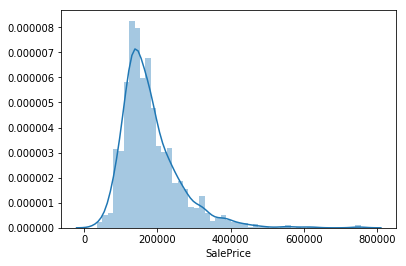

In [5]:
#查看售价分布
sbn.distplot(data['SalePrice'])

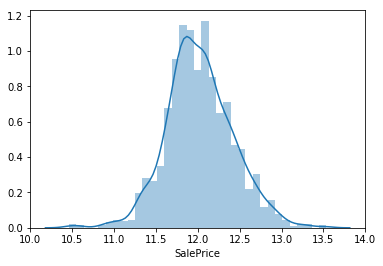

In [6]:
sbn.distplot(np.log1p(data['SalePrice']))

In [7]:
data['SalePrice'] = np.log1p(data['SalePrice'])
x_train, y_train = data.loc[:,:'SaleCondition'], data['SalePrice']
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458 entries, 1 to 1460
Data columns (total 79 columns):
MSSubClass       1458 non-null int64
MSZoning         1458 non-null object
LotFrontage      1199 non-null float64
LotArea          1458 non-null int64
Street           1458 non-null object
Alley            91 non-null object
LotShape         1458 non-null object
LandContour      1458 non-null object
Utilities        1458 non-null object
LotConfig        1458 non-null object
LandSlope        1458 non-null object
Neighborhood     1458 non-null object
Condition1       1458 non-null object
Condition2       1458 non-null object
BldgType         1458 non-null object
HouseStyle       1458 non-null object
OverallQual      1458 non-null int64
OverallCond      1458 non-null int64
YearBuilt        1458 non-null int64
YearRemodAdd     1458 non-null int64
RoofStyle        1458 non-null object
RoofMatl         1458 non-null object
Exterior1st      1458 non-null object
Exterior2nd      1458 non-

### 数值型数据

In [8]:
x_train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1458.000000,1199.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1450.000000,1458.000000,1458.000000,...,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000
mean,56.893004,69.797331,10459.936900,6.093964,5.576132,1971.218107,1984.834019,102.753793,438.827160,46.613169,...,472.050069,94.084362,46.245542,21.984225,3.414266,15.081619,2.433471,43.548697,6.323045,2007.816187
std,42.329437,23.203458,9859.198156,1.376369,1.113359,30.193754,20.641760,179.442156,432.969094,161.420729,...,212.239248,125.350021,65.312932,61.155666,29.337173,55.792877,38.209947,496.460799,2.700167,1.328826
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,59.000000,7544.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,331.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,50.000000,69.000000,9475.000000,6.000000,5.000000,1972.500000,1994.000000,0.000000,382.000000,0.000000,...,479.500000,0.000000,24.500000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11600.000000,7.000000,6.000000,2000.000000,2004.000000,164.750000,711.000000,0.000000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,2188.000000,1474.000000,...,1390.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000


e:\python\python36\lib\site-packages\matplotlib\cbook\__init__.py:1246: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = np.compress(x <= hival, x)
e:\python\python36\lib\site-packages\matplotlib\cbook\__init__.py:1253: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = np.compress(x >= loval, x)
e:\python\python36\lib\site-packages\matplotlib\cbook\__init__.py:1261: RuntimeWarning: invalid value encountered in less
  np.compress(x < stats['whislo'], x),
e:\python\python36\lib\site-packages\matplotlib\cbook\__init__.py:1262: RuntimeWarning: invalid value encountered in greater
  np.compress(x > stats['whishi'], x)


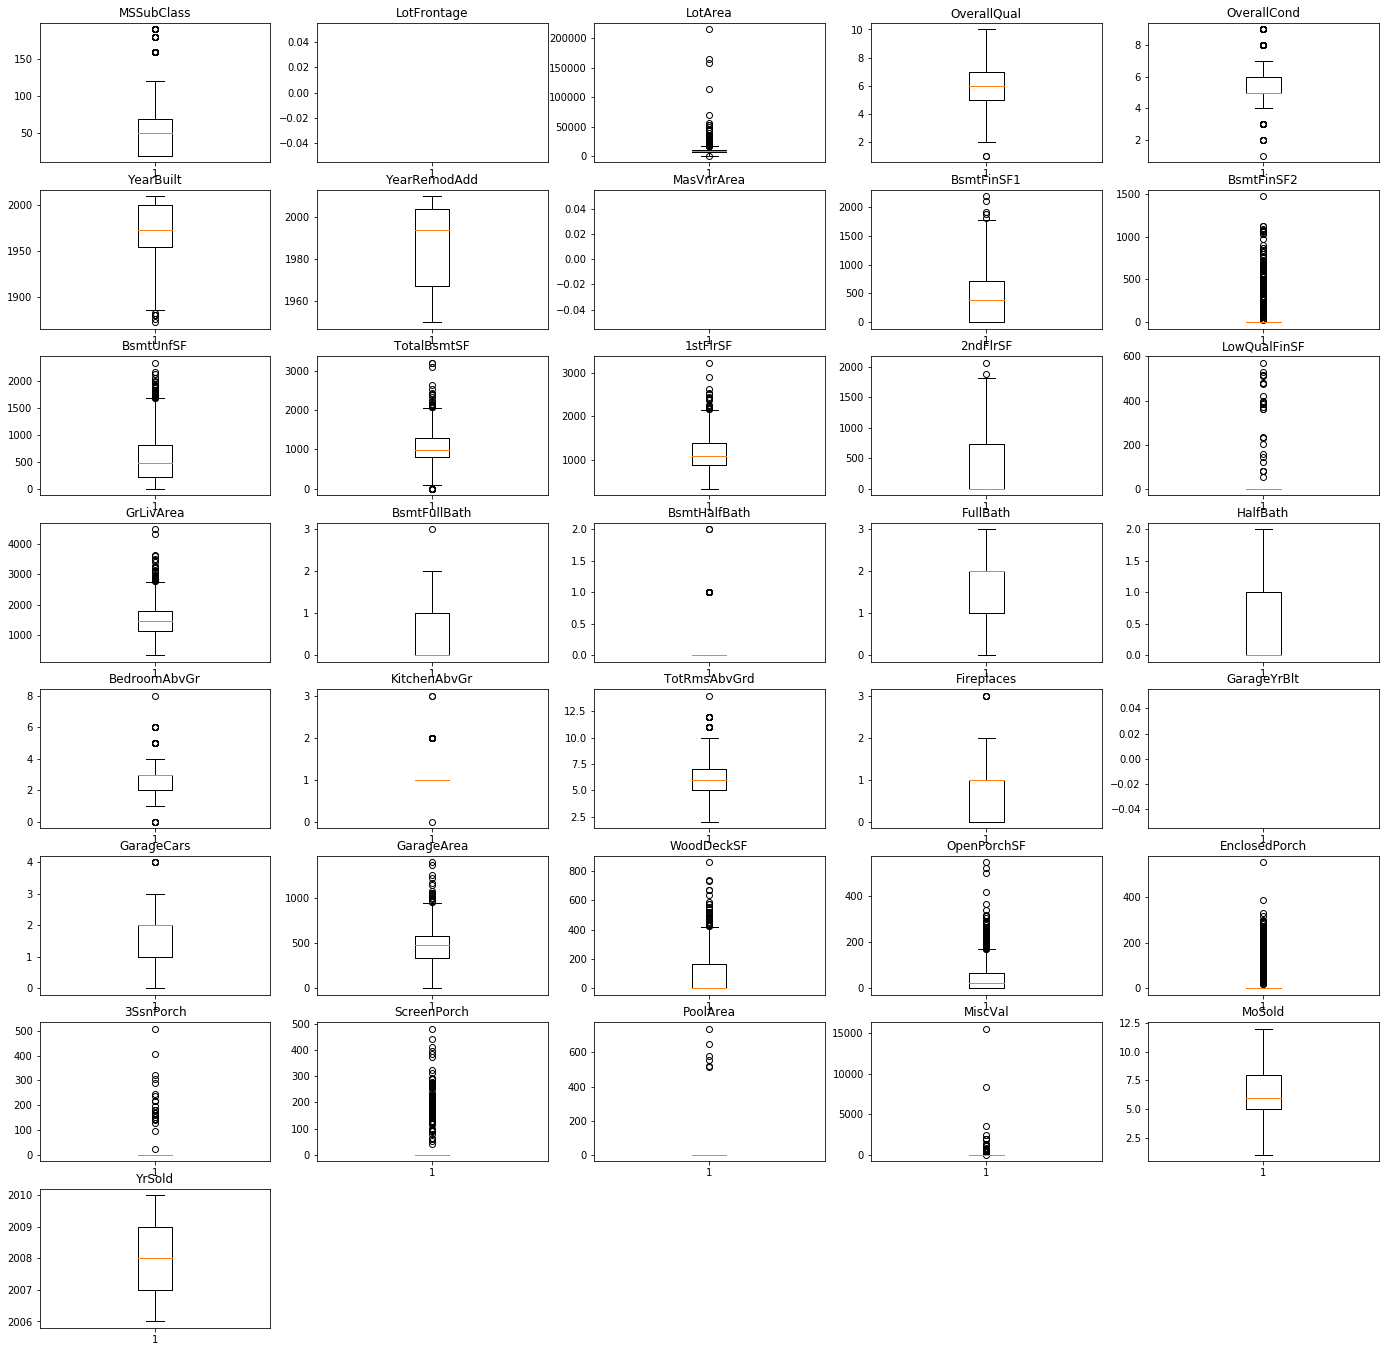

In [9]:
fig = plt.figure(figsize=(24, 24))
count = 1
for x in x_train[x_train.columns[x_train.dtypes != 'object']]:
    ax = fig.add_subplot(8,5, count)
    ax.boxplot(x_train[x])
    ax.set_title(x)
    count += 1

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002957B176780>,
      dtype=object)

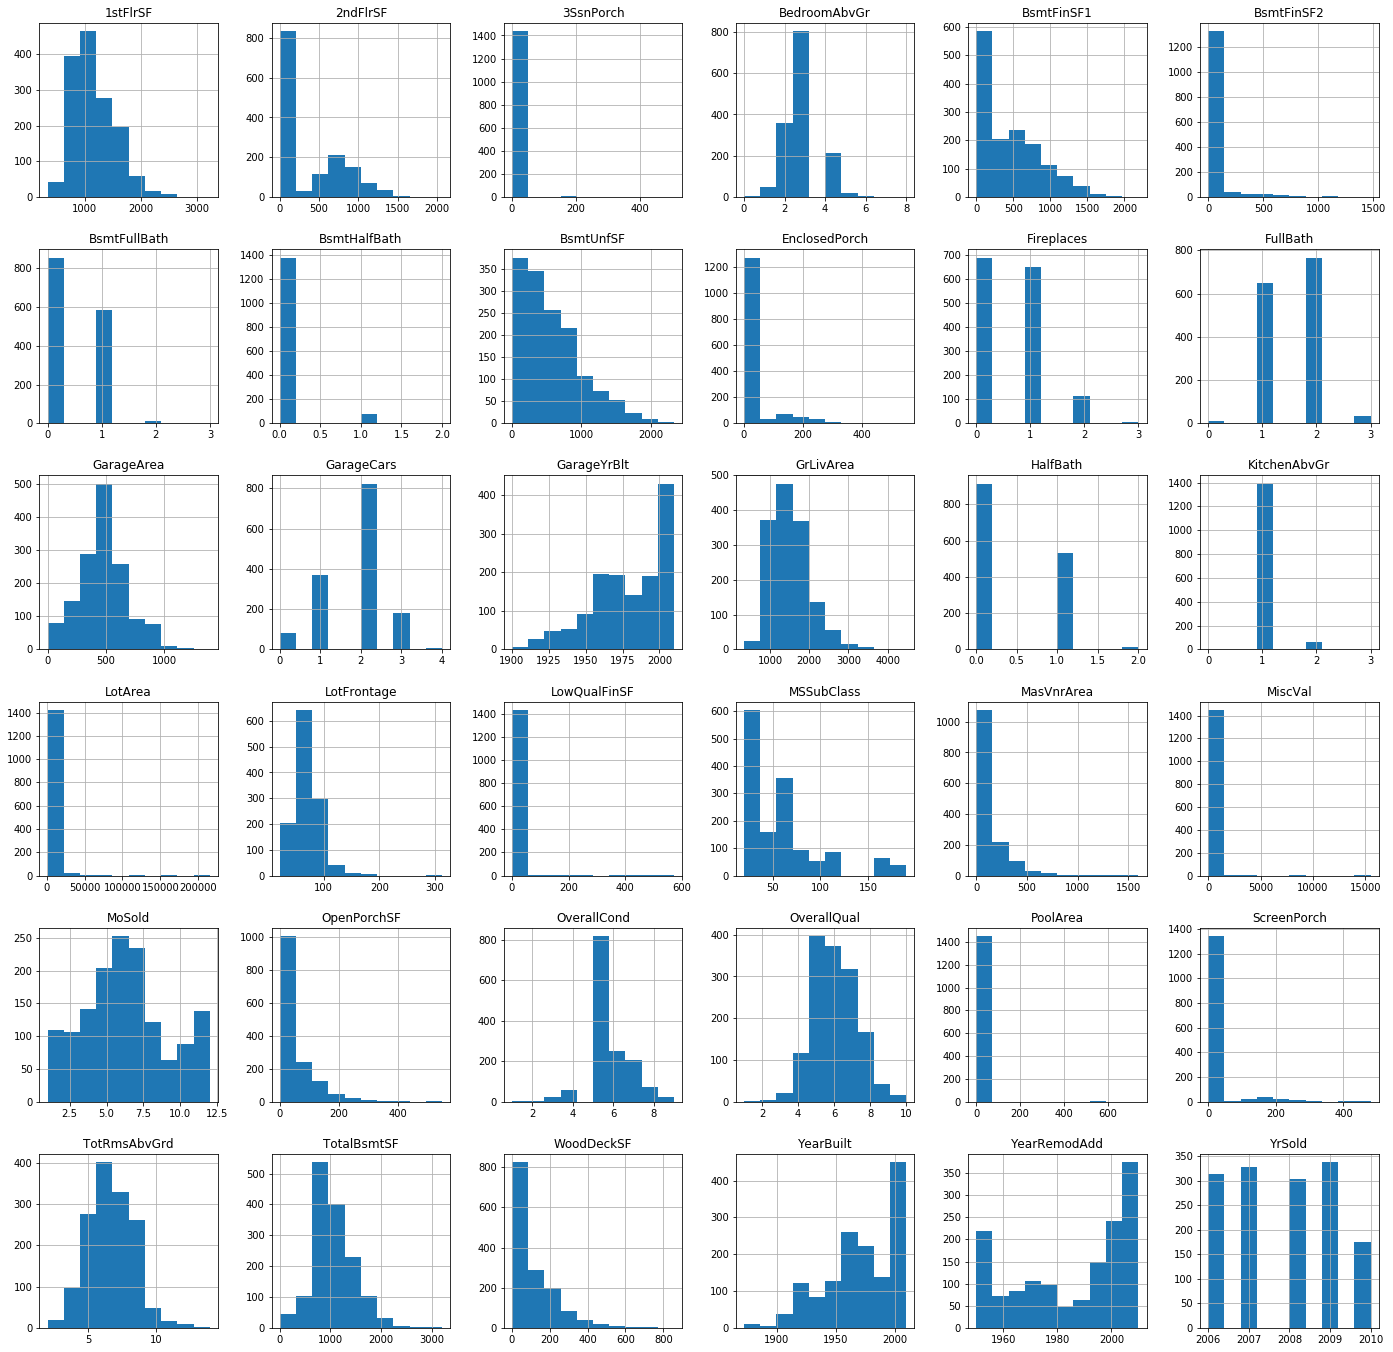

In [10]:
x_train.hist(figsize=(24, 24))

通过对数值型数据的各项指标的描述和直方图可以得出数据分布看出部分数据缺失，如`MSSubClass`、`LotFrontage`等，而大多数数据存在偏斜分布， 如`2ndFlrSF`、`3SsnPorch`等，对于缺失的数据，可以使用中位数进行填充，对于数据分布偏斜的问题，可以通过数据规范化进行调整

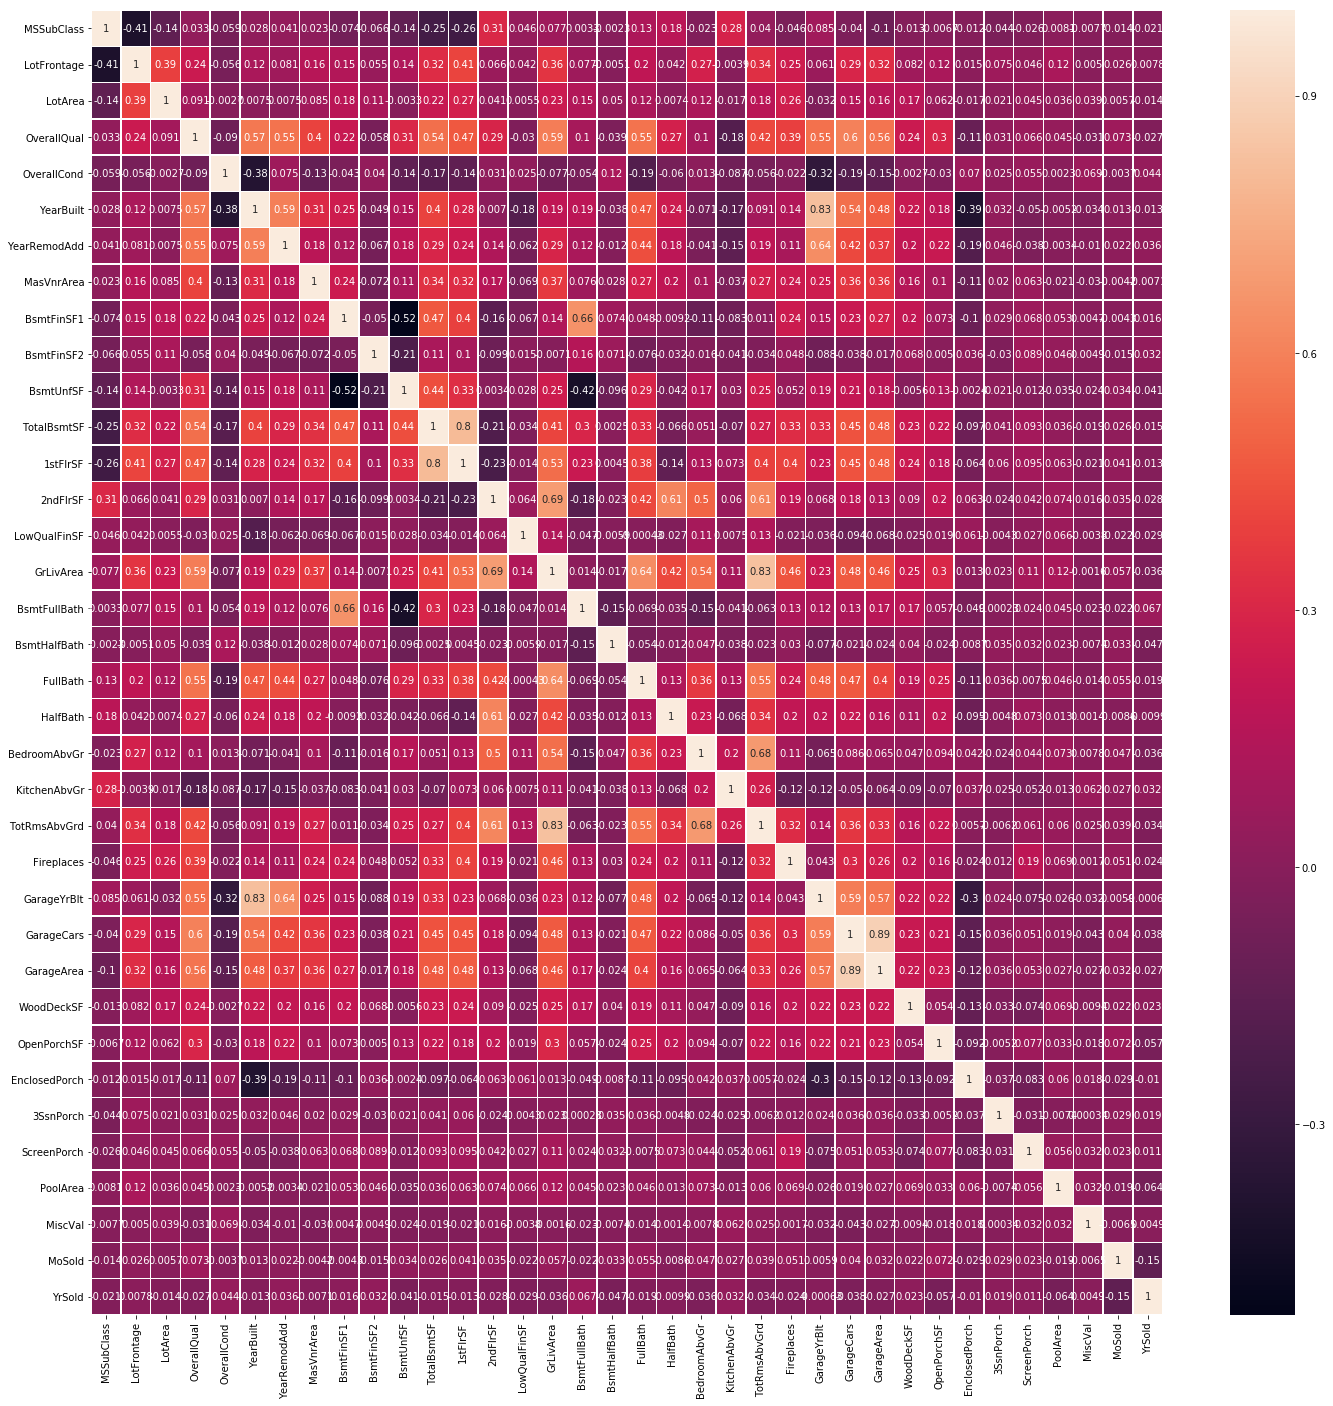

In [11]:
plt.figure(figsize=(24, 24))
sbn.heatmap(x_train.corr(), linewidths=0.5, annot=True)

通过相关性矩阵可以看出`YearBuilt`和`GarageYrBlt`、`TotRmsAbvGrd`和`GrLiveArea`、`1stFlrSF`和`TotalBsmtSF`、`GarageCars`和`GarageArea`具有很高的相关性

### 非数值型数据
数值型数据无论是填充缺失值还是做规整化都是比较容易的，但非数值型数据的分析就稍显复杂了，首先是要确定非数值型数据的取值，然后是明晰每个取值的分布情况，即数量关系

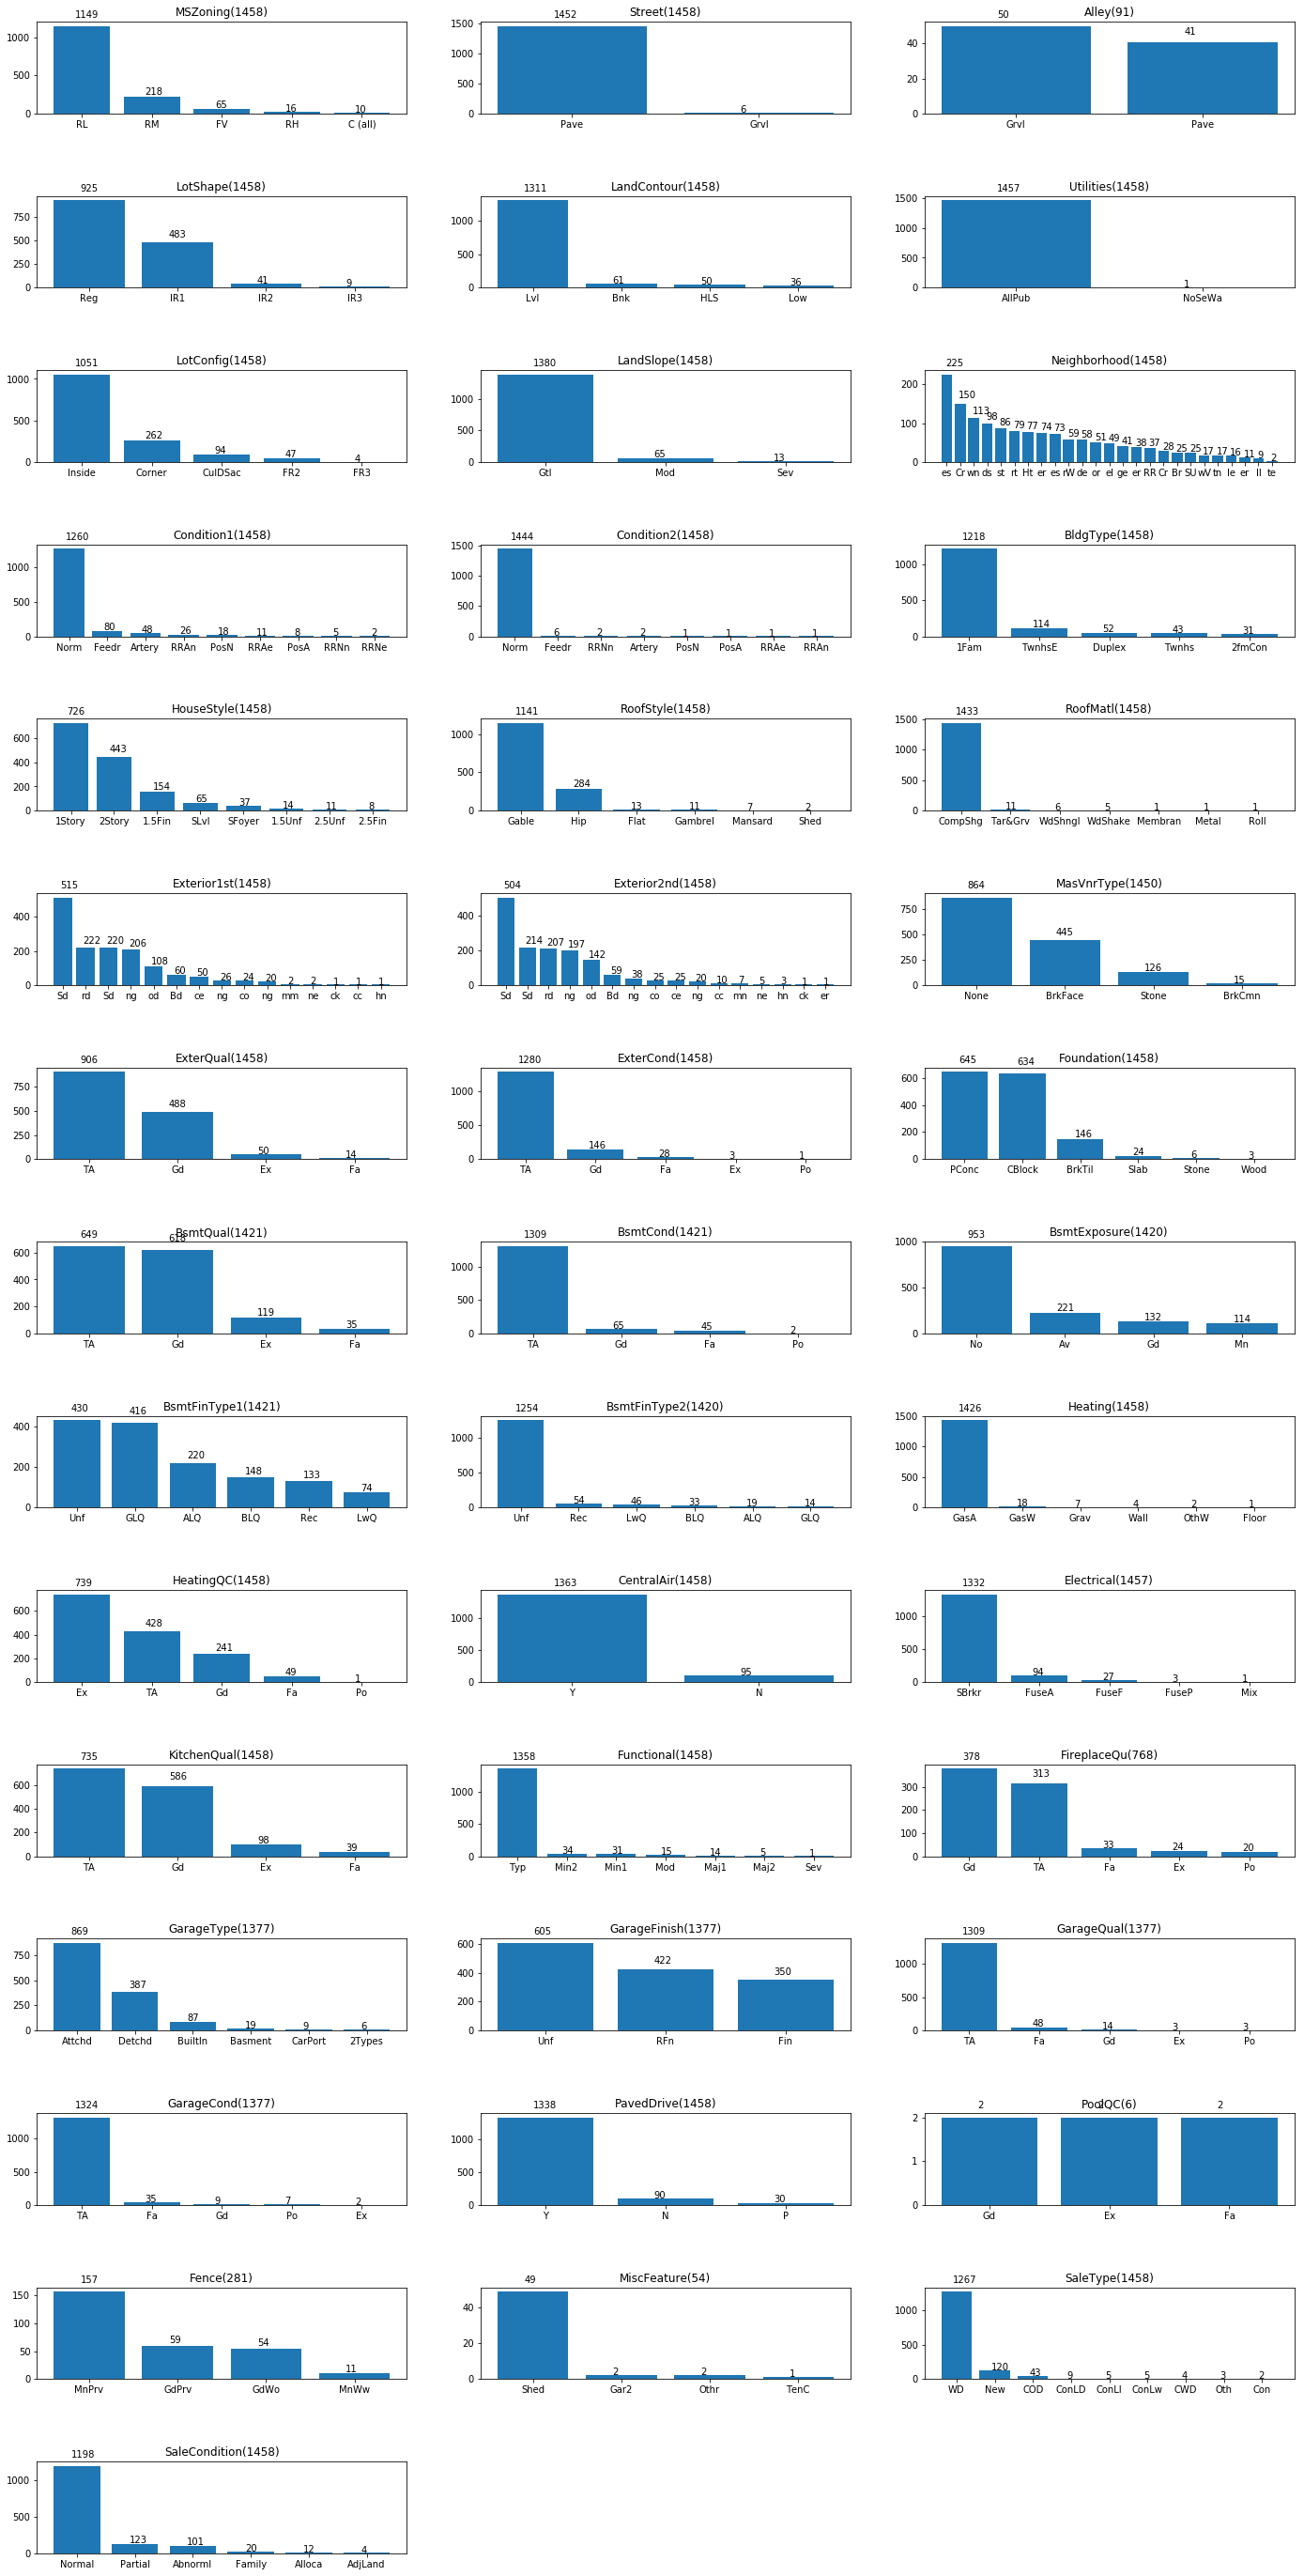

In [12]:
fig = plt.figure(figsize=(24, 48))
count = 1
for x in x_train.columns[x_train.dtypes == 'object']:
    ax = fig.add_subplot(15, 3, count)
    temp_feature = x_train[x].value_counts()
    feature_bar = ax.bar(range(temp_feature.shape[0]), temp_feature.values,  align='center')
    ax.set_xticks(np.arange(temp_feature.shape[0]))
    if temp_feature.shape[0] > 10:
        indexs = [index[-2:] for index in temp_feature.index]
        ax.set_xticklabels(indexs)
    else:
        ax.set_xticklabels(temp_feature.index)
    for bar in feature_bar:
        height = bar.get_height()
        ax.text(bar.get_x()+bar.get_width()/2-0.1, 1.1*height, str(height))
#     ax.set_ylim(0, 1.2 * temp_feature.values[0])
    ax.set_title(x+'('+str(np.sum(temp_feature))+')')
    count+=1
    
plt.subplots_adjust(hspace=0.9, bottom=0.1)

    

通过柱状图可以观测出每个特征的具体数量以及特征中对应类别值的对应分布，从数据的描述中可以得到部分数据为`NA`的表示不具备相关特征，所以使用`None`填充，其它有缺失数据的特征可以使用当前特征中数量最多的类别进行填充；其中`Utilities`中共有1457条相同数据，1条相异数据，对模型并没有多少帮助，因此可以删去这个特征

## 处理数据
在这个阶段，结合以上对数据的观察与分析，着手对数据的预处理，包括填充空值，处理类别数据，筛选特征等

In [8]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import learning_curve
class FeaturePreProcessing(BaseEstimator, TransformerMixin):
    """预处理所有特征"""
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        X['MSSubClass'] = X['MSSubClass'].astype('str')
        X['YrSold'] = X['YrSold'].astype('str')
        X['MoSold'] = X['MoSold'].astype('str')
        X['OverallQual'] = X['OverallQual'].astype('str')
        X['OverallCond'] = X['OverallCond'].astype('str')
        X['TotalSF'] = X['TotalBsmtSF'] + X['1stFlrSF'] + X['2ndFlrSF']
        return X

class FeatureSelect(BaseEstimator, TransformerMixin):
    """特征选取"""
    def __init__(self, obj=True):
        self.obj = obj
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        return X[X.columns[X.dtypes == 'object']] if self.obj else X[X.columns[X.dtypes != 'object']]
    
class NumericalImputer(BaseEstimator, TransformerMixin):
    """数值型特征填充空值"""
    def fit(self, X, y=None):
        self.attributes = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 
                           'Fireplaces', 
                           'MasVnrArea',
                           'GarageCars', 'GarageArea', 'GarageYrBlt']
        return self
    def transform(self, X, y=None):
        for attribute in self.attributes:
            X[attribute].fillna(0.0, inplace=True)
        # 添加总面积特征
        X['TotalSF'] = X['TotalBsmtSF'] + X['1stFlrSF'] + X['2ndFlrSF']
        return X

class StringImputer(BaseEstimator, TransformerMixin):
    """填充String类型的空值"""
    def fit(self, X, y=None):
        self.most_frequent_ = pd.Series([X[c].value_counts().index[0] for c in X],
                        index=X.columns)
        return self
    
    def transform(self, X, y=None):
        """
        Alley: Type of alley access to property
           Grvl Gravel
           Pave Paved
           NA  No alley access
        """
        X['Alley'].fillna('None', inplace=True)
        """
        MasVnrType: Masonry veneer type
           BrkCmn   Brick Common
           BrkFace  Brick Face
           CBlock   Cinder Block
           None None
           Stone    Stone
        """
        X['MasVnrType'].fillna('None', inplace=True)
        """
        BsmtCond: Evaluates the general condition of the basement
           Ex   Excellent
           Gd   Good
           TA   Typical - slight dampness allowed
           Fa   Fair - dampness or some cracking or settling
           Po   Poor - Severe cracking, settling, or wetness
           NA   No Basement
        """
        X['BsmtCond'].fillna('None', inplace=True)
        """
        BsmtExposure: Refers to walkout or garden level walls
           Gd   Good Exposure
           Av   Average Exposure (split levels or foyers typically score average or above)  
           Mn   Mimimum Exposure
           No   No Exposure
           NA   No Basement
        """
        X['BsmtExposure'].fillna('None', inplace=True)
        """
        BsmtFinType1: Rating of basement finished area
           GLQ  Good Living Quarters
           ALQ  Average Living Quarters
           BLQ  Below Average Living Quarters   
           Rec  Average Rec Room
           LwQ  Low Quality
           Unf  Unfinshed
           NA   No Basement
        """
        X['BsmtFinType1'].fillna('None', inplace=True)
        """
        BsmtFinType2: Rating of basement finished area (if multiple types)
           GLQ  Good Living Quarters
           ALQ  Average Living Quarters
           BLQ  Below Average Living Quarters   
           Rec  Average Rec Room
           LwQ  Low Quality
           Unf  Unfinshed
           NA   No Basement
        """
        X['BsmtFinType2'].fillna('None', inplace=True)
        """
        FireplaceQu: Fireplace quality
           Ex   Excellent - Exceptional Masonry Fireplace
           Gd   Good - Masonry Fireplace in main level
           TA   Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
           Fa   Fair - Prefabricated Fireplace in basement
           Po   Poor - Ben Franklin Stove
           NA   No Fireplace
        """
        X['FireplaceQu'].fillna('None', inplace=True)
        """
        GarageType: Garage location
           2Types   More than one type of garage
           Attchd   Attached to home
           Basment  Basement Garage
           BuiltIn  Built-In (Garage part of house - typically has room above garage)
           CarPort  Car Port
           Detchd   Detached from home
           NA   No Garage
        """
        X['GarageType'].fillna('None', inplace=True)
        """
        GarageFinish: Interior finish of the garage
           Fin  Finished
           RFn  Rough Finished  
           Unf  Unfinished
           NA   No Garage
        """
        X['GarageFinish'].fillna('None', inplace=True)
        """
        GarageQual: Garage quality
           Ex   Excellent
           Gd   Good
           TA   Typical/Average
           Fa   Fair
           Po   Poor
           NA   No Garage
        """
        X['GarageQual'].fillna('None', inplace=True)
        """
        GarageCond: Garage condition
           Ex   Excellent
           Gd   Good
           TA   Typical/Average
           Fa   Fair
           Po   Poor
           NA   No Garage
        """
        X['GarageCond'].fillna('None', inplace=True)
#         X['GarageYrBlt'].fillna('None', inplace=True)
        """  
        PoolQC: Pool quality
           Ex Excellent
           Gd Good
           TA Average/Typical
           Fa Fair
           NA No Pool
        """
        X['PoolQC'].fillna('None', inplace=True)
        """
        Fence: Fence quality
           GdPrv  Good Privacy
           MnPrv  Minimum Privacy
           GdWo  Good Wood
           MnWw Minimum Wood/Wire
           NA No Fence
        """
        X['Fence'].fillna('None', inplace=True)
        """
        MiscFeature: Miscellaneous feature not covered in other categories
           Elev Elevator
           Gar2 2nd Garage (if not described in garage section)
           Othr Other
           Shed Shed (over 100 SF)
           TenC Tennis Court
           NA None
        """
        X['MiscFeature'].fillna('None', inplace=True)
        return X.fillna(self.most_frequent_)
    
class DropFeature(BaseEstimator, TransformerMixin):
    """删除部分特征"""
    def __init__(self, features):
        self.features = features
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        return X.drop(self.features, axis=1)

class RemoveOutlier(BaseEstimator, TransformerMixin):
    """处理异常值"""
    def fit(self, X, y=None):
        q1 = X.quantile(0.25)
        q3 = X.quantile(0.75)
        iqr = q3 - q1
        self.upper = q3 + 1.5 * iqr
        self.down = q1 - 1.5 * iqr
        self.median = X.median()
        return self
        
    def transform(self, X, y=None):
        X.where(X <= self.upper, self.upper, axis=1, inplace=True)
        X.where(X >= self.down, self.down, axis=1, inplace=True)
#         X['MiscVal'].where(X['MiscVal'] <= 5000, 5000, inplace=True)
#         X['LotFrontage'].where(X['LotFrontage'] <= 300, 300, inplace=True)
#         X['LotArea'].where(X['LotArea'] <= 100000, 100000, inplace=True )
#         X['MasVnrArea'].where(X['MasVnrArea'] <= 1500, 1500, inplace=True)
#         X['GrLivArea'].where(X['GrLivArea'] <= 4000, 4000, inplace=True)
#         X['EnclosedPorch'].where(X['EnclosedPorch'] <= 400, 400, inplace=True)
#         X['MiscVal'].where(X['MiscVal'] <= 5000, 5000, inplace=True)
        return X
    
def plot_learning_curve(model, X, y):
    train_size, train_scores, test_scores = learning_curve(model, X, y, 
                                                           n_jobs=-1, verbose=True, cv=10, random_state=42)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_size, train_scores_mean - train_scores_std,
                    train_scores_mean + train_scores_std, alpha=0.1,
                    color='r')
    plt.fill_between(train_size, test_scores_mean - test_scores_std,
                    test_scores_mean + test_scores_std, alpha=0.1,
                    color='b')
    plt.plot(train_size, train_scores_mean, 'r-', label='train')
    plt.plot(train_size, test_scores_mean, 'b--',label='val')
    plt.ylim(0.5, 1.05)
    plt.yticks( np.linspace(0.5, 1, 11))
    plt.xlabel('Train Size', fontsize=14)
    plt.ylabel('acc', fontsize=14)
    plt.legend(loc='lower right')

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

all_pipeline = Pipeline([
    ('featurePre', FeaturePreProcessing())
])
numeric_pipeline = Pipeline([
#         ('drop', DropFeature(['PoolQC','YearBuilt', 'TotRmsAbvGrd', '1stFlrSF'])),
        ('selector', FeatureSelect(False)),
        ('impute1', NumericalImputer()),
#         ('outlier', RemoveOutlier()),
        ('impute', SimpleImputer(strategy='median')),
        ('standard', StandardScaler())
])

cat_pipeline = Pipeline([
        ('drop', DropFeature([ 'Utilities'])),
        ('selector', FeatureSelect()),
        ('impute', StringImputer()),
        ('oneHot', OneHotEncoder(sparse=False, handle_unknown='ignore'))
])

full_pipeline = Pipeline([
    ('all_pipeline', all_pipeline),
    ('featureunion',FeatureUnion([
        ('numeric_pipeline', numeric_pipeline),
        ('cat_pipeline', cat_pipeline)]))
])

x_train = full_pipeline.fit_transform(x_train)

# 模型选择
这里将尝试数个模型，比较它们的性能，来选择最优的模型

## 随机梯度下降

In [38]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
lr_pipline = Pipeline([
#     ('poly', PolynomialFeatures(degree=2)),
    ('lr', SGDRegressor(alpha=0.000, penalty='elasticnet'))
])
lr_pipline.fit(x_train, y_train)
lr_pred = cross_val_predict(lr_pipline, x_train, y_train, 
                            verbose=True, n_jobs=-1, cv=3)
lr_mse = mean_squared_error(lr_pred, y_train)
np.sqrt(lr_mse)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.1s finished


0.36300983503926554

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[learning_curve] Training set sizes: [ 131  426  721 1016 1312]


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.0s finished


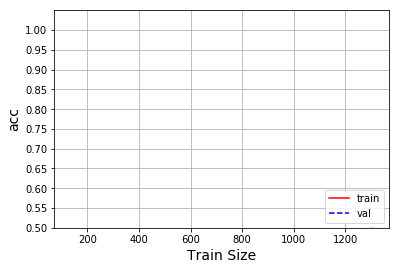

In [11]:
plot_learning_curve(lr_pipline, x_train, y_train)

## 岭回归

In [23]:
from sklearn.kernel_ridge import KernelRidge

ridge = KernelRidge(degree=2, alpha=0.05, kernel='polynomial')
ridge_pred = cross_val_predict(ridge, x_train, y_train, 
                               cv=3, verbose=True, n_jobs=-1)
ridge_mse = mean_squared_error(y_train, ridge_pred)
np.sqrt(ridge_mse)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.1s finished


0.11650866851364311

[learning_curve] Training set sizes: [ 131  426  721 1016 1312]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.2s finished


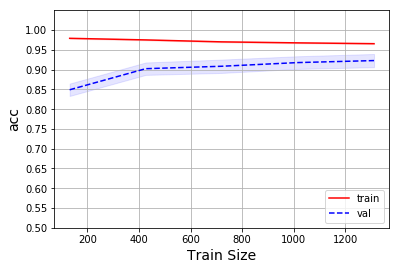

In [24]:
plot_learning_curve(ridge, x_train, y_train)

使用岭回归可以看到训练正确率有所下降，验证正确率有所上升，下面再试试`LASSO`回归

## LASSO回归

In [19]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.0005)
lasso_pred = cross_val_predict(lasso, x_train, y_train, 
                               cv=3, verbose=True, n_jobs=-1)
lasso_mse = mean_squared_error(lasso_pred, y_train)
np.sqrt(lasso_mse)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.3s finished


0.1165640368257087

[learning_curve] Training set sizes: [ 131  426  721 1016 1312]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.8s finished


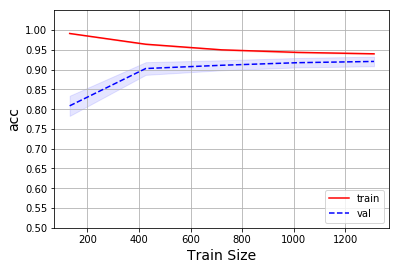

In [20]:
plot_learning_curve(lasso, x_train, y_train)

可以看出`Lasso`的效果并没有岭回归好，可能是因为`Lasso`使用`l1`范数稀疏掉了过多的特征导致其泛化能力的下降

## Elastic Net

In [25]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import RandomizedSearchCV

en = ElasticNet()
en_param = {
    'l1_ratio': np.linspace(0.3, 0.8),
    'alpha': np.linspace(0, 0.01)
}
en_grid_cv = RandomizedSearchCV(en, param_distributions=en_param, verbose=True, 
                                cv=3, n_jobs=-1)
en_grid_cv.fit(x_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    1.1s finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=-1,
          param_distributions={'l1_ratio': array([0.3    , 0.3102 , 0.32041, 0.33061, 0.34082, 0.35102, 0.36122,
       0.37143, 0.38163, 0.39184, 0.40204, 0.41224, 0.42245, 0.43265,
       0.44286, 0.45306, 0.46327, 0.47347, 0.48367, 0.49388, 0.50408,
       0.51429, 0.52449, 0.53469, 0.5449 , 0.5551 , 0.565...16, 0.00837,
       0.00857, 0.00878, 0.00898, 0.00918, 0.00939, 0.00959, 0.0098 ,
       0.01   ])},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=True)

In [26]:
en_grid_cv.best_estimator_

ElasticNet(alpha=0.0010204081632653062, copy_X=True, fit_intercept=True,
      l1_ratio=0.463265306122449, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [27]:
en_grid_cv.best_score_

0.9146106170954819

In [28]:
en_pred = cross_val_predict(en_grid_cv.best_estimator_, x_train, y_train, 
                            verbose=True, n_jobs=-1, cv=3)
mse = mean_squared_error(y_train, en_pred)
np.sqrt(mse)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.3s finished


0.11690963838736408

[learning_curve] Training set sizes: [ 131  426  721 1016 1312]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.7s finished


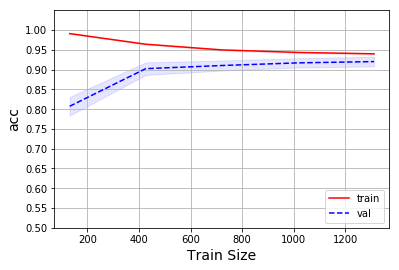

In [29]:
plot_learning_curve(en_grid_cv.best_estimator_, x_train, y_train)

### KernelPCA

In [21]:
# from sklearn.decomposition import KernelPCA
# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import RandomizedSearchCV
# lr_pipeline = Pipeline([
# #     ('kpca', KernelPCA()),
#     ('lr', LinearRegression())
# ])

# lr_param = {
# #     'kpca__gamma': np.linspace(0.001, 0.03, 10),
# #     'kpca__kernel': ['rbf', 'linear', 'poly'],
#     'lr__normalize': [False, True]
# }

# lr_grid_cv = RandomizedSearchCV(lr_pipeline, param_distributions=lr_param, cv=3, 
#                           verbose=True, n_jobs=-1, iid=True)
# lr_grid_cv.fit(x_train, y_train)

In [22]:
# lr_grid_cv.best_params_

In [23]:
# lr_grid_cv.best_score_

In [24]:
# lr = lr_grid_cv.best_estimator_
# lr_pred = cross_val_predict(lr, x_train, y_train, 
#                             cv=3, verbose=True, n_jobs=-1)
# mse = mean_squared_error(y_train, lr_pred)
# np.sqrt(mse)

In [25]:
# plot_learning_curve(lr, x_train, y_train)

可以明显看到，使用PCA之后训练集的准确率为`1`，这是明显的过拟合现象

## 随机森林

In [78]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
rf_pipeline = Pipeline([
#     ('kpca', KernelPCA()),
    ('rf', RandomForestRegressor(n_estimators=100, oob_score=True))
])
rf_param = {
#     'kpca__gamma': np.linspace(0.01, 0.10, 10),
#     'kpca__degree': np.arange(1, 5),
#     'kpca__kernel': ['rbf', 'linear', 'poly'],
    'rf__n_estimators': np.arange(3000, 9000, 100),
    'rf__max_depth': np.arange(3, 10),
#     'rf__min_samples_leaf': np.linspace(1e-3, 0.5),
#     'rf__min_samples_split': np.linspace(1e-3, 1)
}
rf_grid_cv = RandomizedSearchCV(rf_pipeline, param_distributions=rf_param,
                         cv=3, verbose=True, n_jobs=-1)
rf_grid_cv.fit(x_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 17.5min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=Pipeline(memory=None,
     steps=[('rf', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=True, random_state=None, verbose=0, warm_start=False))]),
          fit_params=None, iid='warn', n_iter=10, n_jobs=-1,
          param_distributions={'rf__n_estimators': array([3000, 3100, 3200, 3300, 3400, 3500, 3600, 3700, 3800, 3900, 4000,
       4100, 4200, 4300, 4400, 4500, 4600, 4700, 4800, 4900, 5000, 5100,
       5200, 5300, 5400, 5500, 5600, 5700, 5800, 5900, 6000, 6100, 6200,
       6300, 6400, 6500, 6600, 6700, 6800, 6900, 7000, 7100, 7200, 7300,
       7400, 7500, 7600, 7700, 7800, 7900, 8000, 8100, 8200, 8300, 8400,
       8500, 8

In [79]:
rf_grid_cv.best_estimator_

Pipeline(memory=None,
     steps=[('rf', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=8000, n_jobs=None,
           oob_score=True, random_state=None, verbose=0, warm_start=False))])

In [80]:
rf_grid_cv.best_score_

0.8707088532297902

In [81]:
rf_pred = cross_val_predict(rf_grid_cv.best_estimator_, x_train, y_train, 
                                 verbose=True, n_jobs=-1, cv=3)
mse = mean_squared_error(y_train, rf_pred)
np.sqrt(mse)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  3.5min finished


0.1440059861172048

In [82]:
plot_learning_curve(rf_grid_cv.best_estimator_, x_train, y_train)

[learning_curve] Training set sizes: [ 131  426  721 1016 1312]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


KeyboardInterrupt: 

## GBDT

In [44]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV

gbdt_param = {
    'n_estimators': np.arange(1000, 5000, 100),
    'max_depth': np.arange(2, 10),
    'subsample': np.linspace(0.1, 1, 20),
    'max_features':['auto', 'sqrt', 'log2']
}

gbdt_grid_cv = RandomizedSearchCV(GradientBoostingRegressor(n_estimators=100), param_distributions=gbdt_param, n_jobs=-1,
                                 verbose=True, random_state=42, cv=3)
gbdt_grid_cv.fit(x_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   14.8s finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_sampl...=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=-1,
          param_distributions={'n_estimators': array([100, 200, 300, 400, 500, 600, 700, 800, 900]), 'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]), 'subsample': array([0.1    , 0.14737, 0.19474, 0.24211, 0.28947, 0.33684, 0.38421,
       0.43158, 0.47895, 0.52632, 0.57368, 0.62105, 0.66842, 0.71579,
       0.76316, 0.81053, 0.85789, 0.90526, 0.95263, 1.     ]), 'max_features': ['auto', 'sqrt', 'log2']},
          pre_dispatch='2*n_jobs', random_state=42, refit=Tr

In [45]:
gbdt_grid_cv.best_estimator_

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=300,
             n_iter_no_change=None, presort='auto', random_state=None,
             subsample=0.5263157894736842, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [46]:
gbdt_grid_cv.best_score_

0.9078141544493632

In [47]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error
gbdt = gbdt_grid_cv.best_estimator_
gbdt_pred = cross_val_predict(gbdt, x_train, y_train,
                             verbose=True, n_jobs=-1, cv=5)
mse = mean_squared_error(y_train, gbdt_pred)
np.sqrt(mse)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.7s finished


0.12068408885068081

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[learning_curve] Training set sizes: [ 131  426  721 1016 1312]


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    4.2s finished


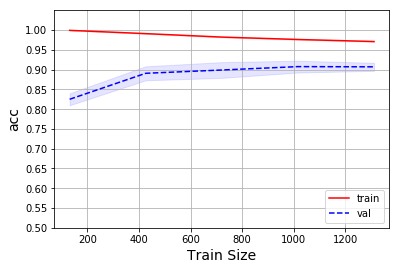

In [48]:
plot_learning_curve(gbdt, x_train, y_train)

## XGBoost

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_predict
from sklearn.pipeline import Pipeline
from sklearn.decomposition import KernelPCA
xg = XGBRegressor(n_estimators=100, n_jobs=-1, random_state=42)
xg_pipeline = Pipeline([
#     ('kpca',KernelPCA()),
    ('xg', xg)
])
xg_param = {
#     'kpca__gamma': np.linspace(0.01, 0.10, 10),
#     'kpca__kernel': ['rbf', 'linear', 'poly'],
    'xg__n_estimators': np.arange(3000, 5000, 100),
    'xg__max_depth': np.arange(2, 10) ,
    'xg__gamma': np.linspace(0, 0.1),
    'xg__min_child_weight': np.linspace(1, 5),
    'xg__reg_lambda': np.linspace(0, 1),
    'xg__reg_alpha': np.linspace(0, 1),
    'xg__colsample_bytree': np.linspace(0, 1),
    'xg__subsample': np.linspace(0, 1),
    'xg__learning_rate': np.linspace(0, 0.1)
}
xg_grid_cv = RandomizedSearchCV(xg_pipeline, param_distributions=xg_param, cv=3,
                               n_jobs=-1, verbose=True)
xg_grid_cv.fit(x_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


In [ ]:
xg_grid_cv.best_estimator_

In [ ]:
xg_grid_cv.best_score_

In [ ]:
xg_pred = cross_val_predict(xg_grid_cv.best_estimator_, x_train, y_train, 
                            cv=3, verbose=True, n_jobs=-1)

In [ ]:
mse = mean_squared_error(y_train, xg_pred)
np.sqrt(mse)

In [ ]:
plot_learning_curve(xg, x_train, y_train)

# 预测

In [ ]:
test = pd.read_csv('house_price/test.csv')
index = np.array(test[['Id']])[:,0]
test = test.set_index(['Id'])
x_test = full_pipeline.transform(test)

In [ ]:
# ridge.fit(x_train, y_train)
pred =  xg_grid_cv.best_estimator_.predict(x_test)
pred_df = pd.DataFrame({'Id':index,
                       'SalePrice':pred})
pred_df.to_csv('./house_price/prediction.csv', index='')